# Labolatorium nr 11

## Import bibliotek oraz ich konfiguracja

In [113]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time

# Matplotlib settings
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.style.use('ggplot')

## Zadanie 1 - QR decomposition

In [114]:
def qr_decomposition(A):
    """
    QR decomposition of a matrix A.
    """
    n, m = A.shape

    l = min(n, m)
    n = l
    m = l
    Q = np.zeros((n, m)) 
    R = np.zeros((n, m))

    u_vectors = []
    e_vectors = []
    for j in range(m):
        u = A[:, j]

        for e in e_vectors:
            u -= np.dot(e, A[:, j]) * e

        e = u / np.linalg.norm(u)
        e_vectors.append(e)
        u_vectors.append(u)

    for i in range(n):
        for j in range(m):
            Q[i, j] = e_vectors[j][i]

    for i in range(n):
        for j in range(m):
            R[i, j] = np.dot(e_vectors[i], A[:, j])

    return Q, R
    

def adjust_sign(Q, R):
    """
    Adjust the signs of the columns in Q and rows in R to
    impose positive diagonal of Q
    """

    D = np.diag(np.sign(np.diag(Q)))

    Q[:, :] = Q @ D
    R[:, :] = D @ R

    return Q, R

In [115]:
# Test QR decomposition with numpy implementation
sizes = [10, 100, 500, 1000]

for size in sizes:
    A = np.random.rand(size, size)
    Q, R = adjust_sign(*qr_decomposition(A))
    Q_numpy, R_numpy = adjust_sign(*np.linalg.qr(A))

    print(f"Error: {np.linalg.norm(Q - Q_numpy) + np.linalg.norm(R - R_numpy)}")

Error: 3.3581107751292063e-15
Error: 6.575589048380738e-13
Error: 3.152010565357308e-11
Error: 4.919602830519545e-11


In [116]:
def generate_matrix_with_random_cond(A, cond):
    U, _, V = np.linalg.svd(A)
    D = np.linspace(cond, 1, A.shape[0])
    return U @ np.diag(D) @ V

In [117]:
errors = []
n = 8
conds = np.linspace(1, 100, 30)
for i in range(30):
    A = np.random.rand(n, n)
    A = generate_matrix_with_random_cond(A, conds[i])
    Q, R = qr_decomposition(A)
    errors.append(np.linalg.norm(np.eye(n) - Q @ Q.T))

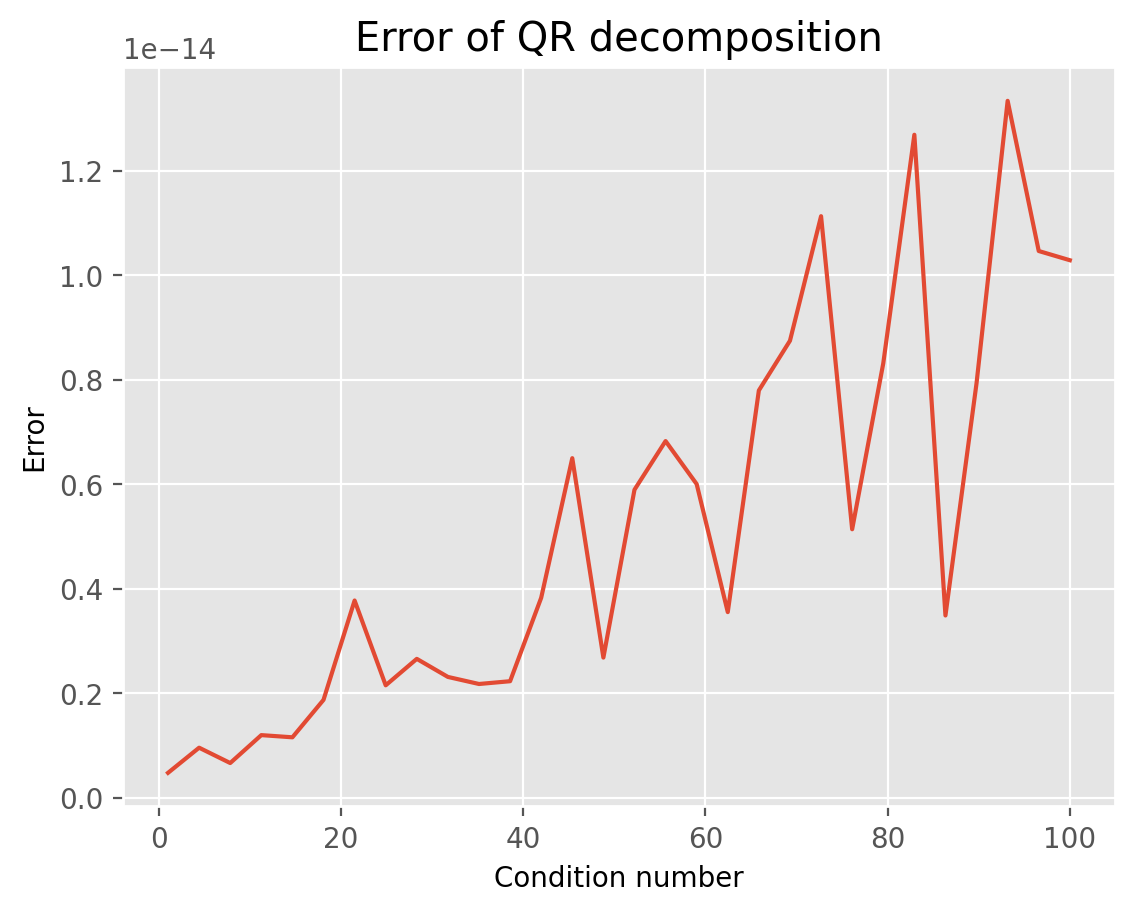

In [118]:
plt.title("Error of QR decomposition")
plt.xlabel("Condition number")
plt.ylabel("Error")
plt.plot(conds, errors)
plt.show()

## Zadanie 2 - Rozwiązywanie układów nadokreślonych metodą QR

Error: 1.273725881961116


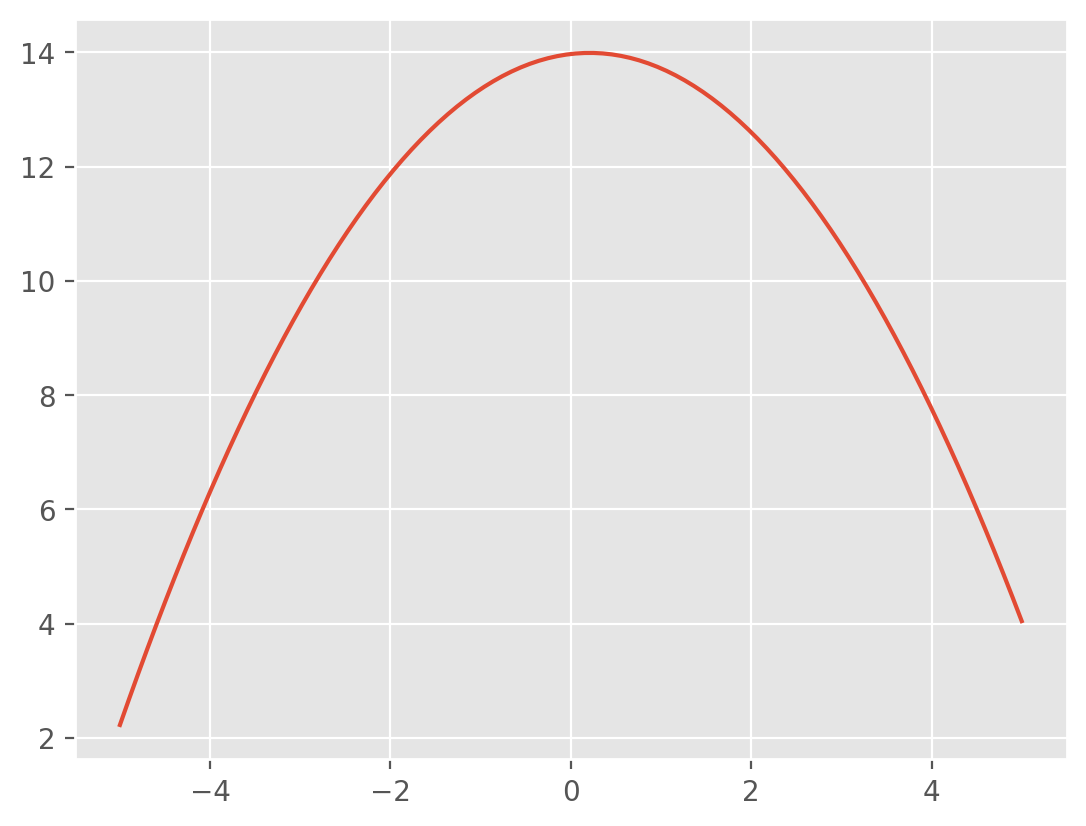

In [119]:
def solve_overdetermined_equation(A, b):
    Q, R = np.linalg.qr(A)
    Qb = np.dot(Q.T,b) 
    x =  np.linalg.solve(R,Qb)
    return x

# Test
b = np.array([2,7,9,12,13,14,14,13,10,8,4])
A = np.zeros((11, 3))
for i in range(-5,6):
    A[i+5, :] = [i**2, i, 1]

x = solve_overdetermined_equation(A, b)
print(f"Error: {np.linalg.norm(A @ x - b)}")

# Plot function
points = np.linspace(-5, 5, 100)
plt.plot(points, x[0] * points**2 + x[1] * points + x[2])
plt.show()